In [1]:
import pandas as pd
from sklearn import *
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import os
os.environ["Path"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


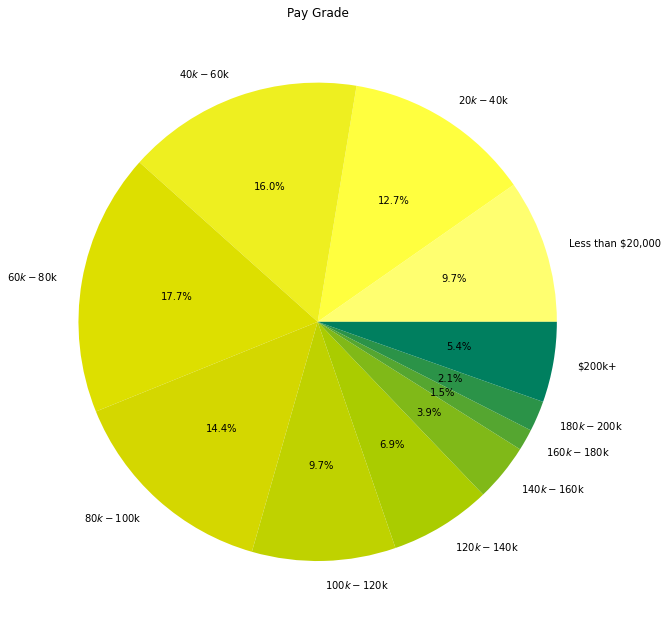

In [17]:
df = pd.read_csv("DataDraft1.csv")
#Create Pie chart of Pay Grade
df["PayAnnual"].value_counts()
fig1, ax1 = plt.subplots()
PayDf = df.PayAnnual.value_counts().rename_axis('Pay Ranges').reset_index(name='counts')
PayDf["Pay Ranges"] = pd.Categorical(PayDf["Pay Ranges"], categories=["Less than $20,000", "$20k - $40k", "$40k - $60k", "$60k - $80k", "$80k - $100k", "$100k - $120k", "$120k - $140k", "$140k - $160k", "$160k - $180k", "$180k - $200k", "$200k+"], ordered=True)
PayDf = PayDf.sort_values("Pay Ranges")
colors = ["#007f5f", "#2b9348", "#55a630", "#80b918", "#aacc00", "#bfd200", "#d4d700", "#dddf00", "#eeef20", "#ffff3f","#FFFF70"]
colors.reverse()
ax1.pie(PayDf["counts"], labels=PayDf["Pay Ranges"],autopct='%1.1f%%',colors=colors)
ax1.set_title("Pay Grade")
fig1.set_size_inches(19, 11)
fig1.savefig('PieChartOfPayGrade.png', dpi=600)


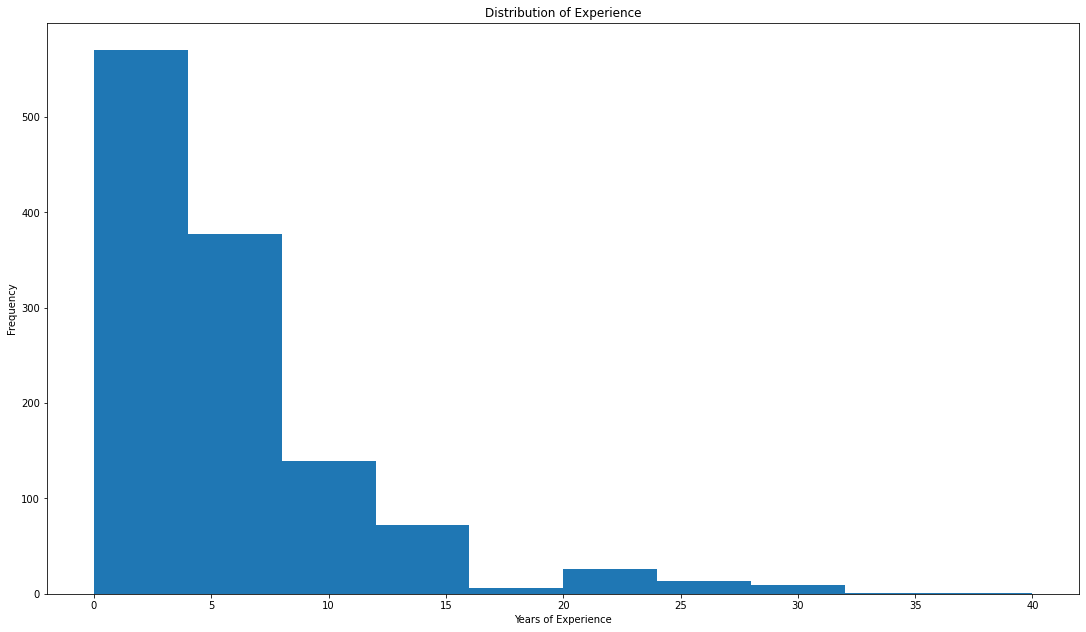

In [3]:
#Create Histogram of Years of experience
df["YearsDVExperience"].dropna()
fig2, ax2 =plt.subplots()
ax2.hist(df["YearsDVExperience"])
ax2.set_title("Distribution of Experience")
ax2.set_xlabel("Years of Experience")
ax2.set_ylabel("Frequency")
fig2.set_size_inches(18.5, 10.5)
fig2.savefig('HistogramOfExperience.png', dpi=600)

In [4]:
#Years of experience vs Hourly Wage
df2 = pd.read_excel("2021SOTI_SurveyDataForPublic_COPY.xlsx", sheet_name="data_repub_2019",header=2)
df3 = df2[["PayHourly", "YearsDVExperience"]]
df3.dropna(how='any',inplace=True)

C:\Users\David\AppData\Local\Temp\ipykernel_11232\3190484587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(how='any',inplace=True)


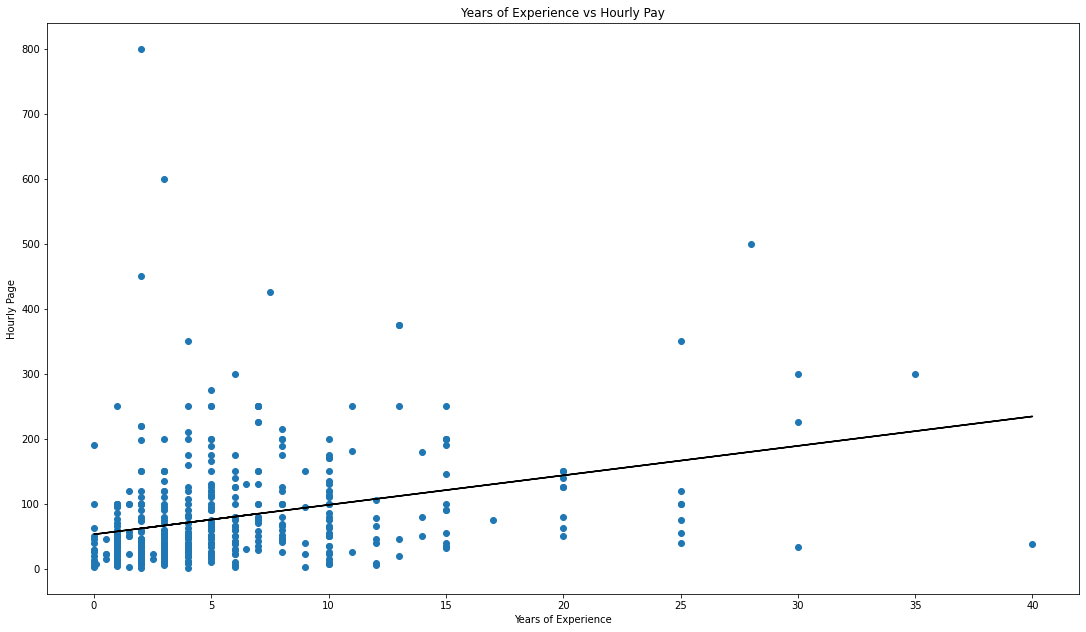

In [5]:
#Years of Experience vs Hourly Wage cont.
b, m= np.polynomial.polynomial.polyfit(df3["YearsDVExperience"], df3["PayHourly"],1)
fig3, ax3 =plt.subplots()
ax3.scatter(df3["YearsDVExperience"], df3["PayHourly"])
ax3.plot(df3["YearsDVExperience"], b+m*df3["YearsDVExperience"],'-',color='black')
ax3.set_title("Years of Experience vs Hourly Pay")
ax3.set_xlabel("Years of Experience")
ax3.set_ylabel("Hourly Page")
fig3.set_size_inches(18.5, 10.5)
fig3.savefig('ExperienceVsHourlyPay.png', dpi=600)


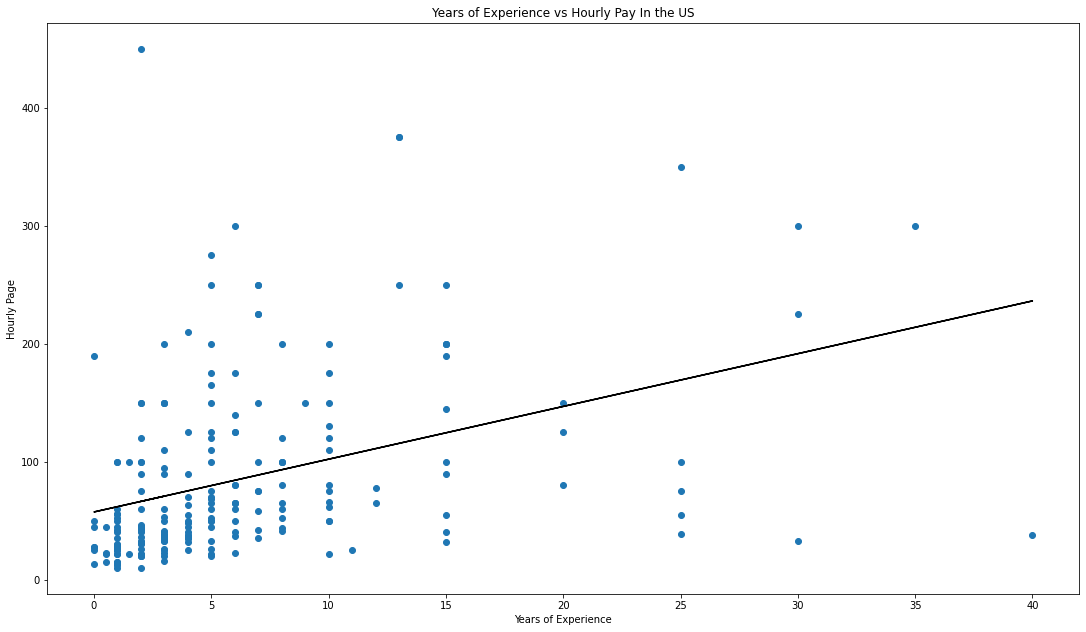

In [6]:
#Years of Experience vs Hourly Wage cont. Filtered for US
df4 = df2[["PayHourly", "YearsDVExperience","Loc1Country__cleaned"]]
df4 = df4[df4["Loc1Country__cleaned"]=="United States"]
df4.dropna(how='any',inplace=True)

b, m= np.polynomial.polynomial.polyfit(df4["YearsDVExperience"], df4["PayHourly"],1)
fig4, ax4 =plt.subplots()
ax4.scatter(df4["YearsDVExperience"], df4["PayHourly"])
ax4.plot(df4["YearsDVExperience"], b+m*df4["YearsDVExperience"],'-',color='black')
ax4.set_title("Years of Experience vs Hourly Pay In the US")
ax4.set_xlabel("Years of Experience")
ax4.set_ylabel("Hourly Page")
fig4.set_size_inches(18.5, 10.5)
fig4.savefig('ExperienceVsHourlyPayUS.png', dpi=600)

In [7]:
#Reformat for Decision Tree Classifier Using, Role, Freelance, Educ-level, Loc1Country (IsThirdWorld), Experience
df["ExperienceCut"] = pd.qcut(df['YearsDVExperience'], q=4)
df["ExperienceCut"] = df["ExperienceCut"].cat.codes
df["Freelance"].replace(["Unclear","Occasional"],["No","No"],inplace=True)
df["Freelance"] = pd.Categorical(df["Freelance"])
df["FreelanceCodes"] = df["Freelance"].cat.codes
df["RoleMultichoice"].value_counts()
df["IsLeadership"]=df["RoleMultichoice"].replace(["Analyst",
"Designer",
"Developer",
"Scientist",
"Engineer",
"Academic",
"None of these describe my role",
"Student",
"Freelancer"],"Non-Leadership")
df["IsLeadership"] = pd.Categorical(df["IsLeadership"])
df["IsLeadership"]=df["IsLeadership"].cat.codes
df["EducLevel"] = df["EducLevel"].replace(["Technical School","Some College","None"],"Other")
df["EducLevel"] = pd.Categorical(df["EducLevel"])
df["EducCode"] = df["EducLevel"].cat.codes
firstWorld = ["Norway","Ireland","Switzerland","Iceland","Germany","Sweden","Netherlands","Australia","Denmark","Singapore","United Kingdom","New Zealand","Belgium","Canada","United States","Austria","Liechtenstein","Israel","Japan","Slovenia","Luxembourg","South Korea","Spain","France","Malta","Estonia","Italy","United Arab Emirates","Greece","Cyprus", "Lithuania","Poland","Andorra","Latvia","Portugal","Slovakia","Hungary","Saudi Arabia", "Bahrain","Croatia","Chile","Qatar","Argentina","Montenegro","Romania","Palau","Kazakhstan","Russia","Belarus","Turkey","Bulgaria","Barbaados","Bahamas","Oman","Georgia","Costa Rica","Malaysia","Kuwait","Serbia","Mauritius"]
df["Loc1Country__cleaned"].value_counts()
df["FW"] = df["Loc1Country__cleaned"].replace(firstWorld,"First World")
df["FW"] = (df["FW"][df["FW"]=="First World"])
df["FW"]=df["FW"].fillna("Not First World")
df["FW"] = pd.Categorical(df["FW"])
df["SW"] = df["FW"].cat.codes
df["SW"].value_counts()

0    1082
1     226
Name: SW, dtype: int64

In [8]:
df = df.dropna(how="any")
df=df[df['Loc1Country__cleaned'].str.contains("United States")]

0.23387096774193547


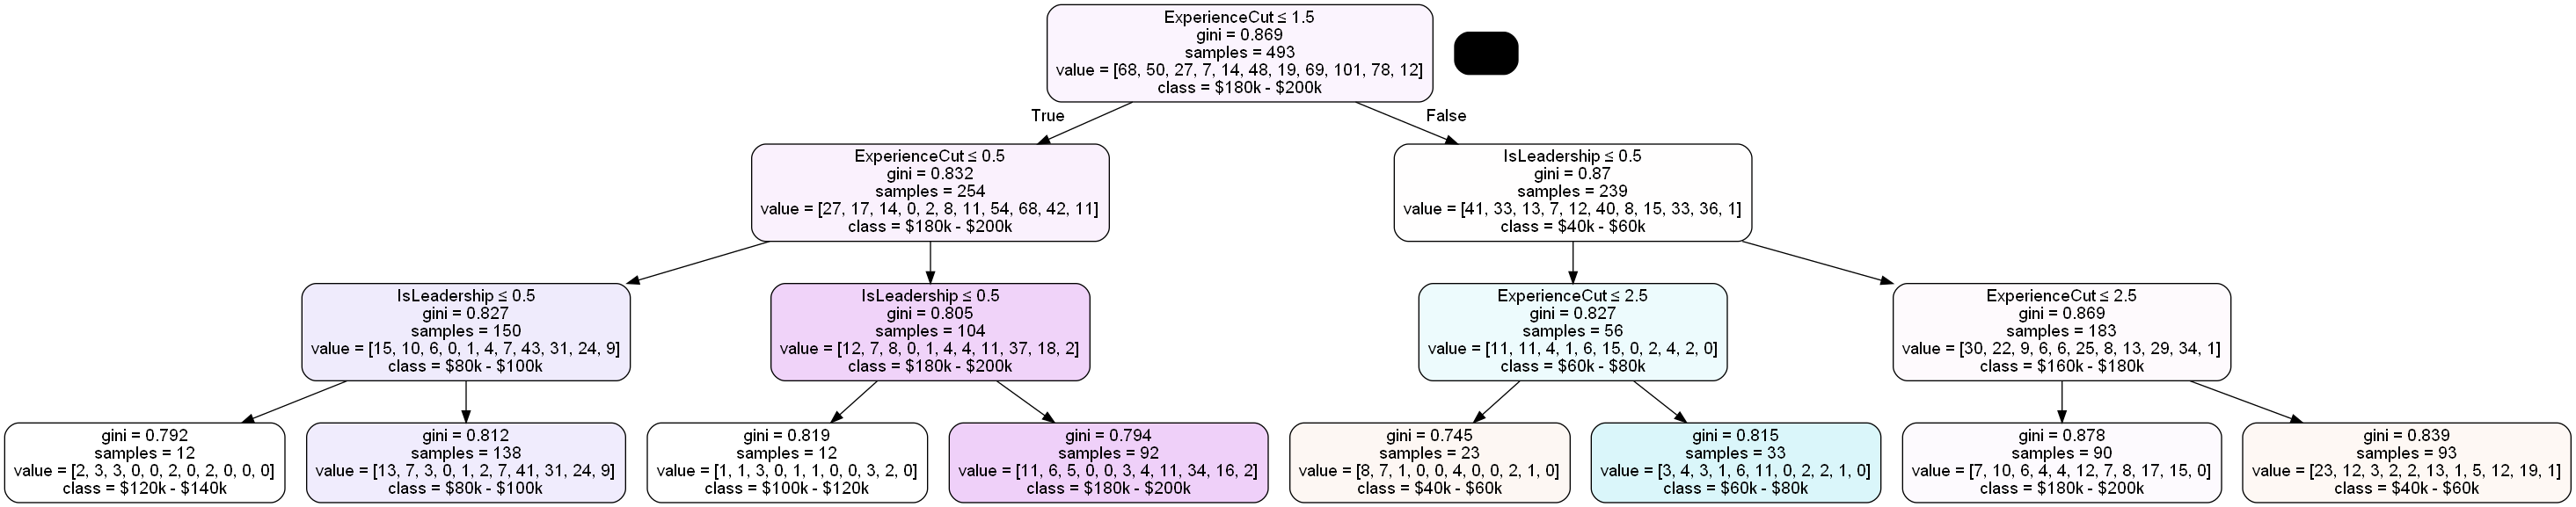

In [9]:
#Decision Tree to Predict Pay Grade *In the US
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["ExperienceCut","FreelanceCodes","IsLeadership","EducCode"]],df["PayAnnual"],test_size=.2,random_state=42)

clf_pruned = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)
import io
from io import StringIO

from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
xvar = df[["ExperienceCut" ,"FreelanceCodes", "IsLeadership","EducCode"]]
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=df["PayAnnual"].unique())
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
print(clf_pruned.score(X_test,y_test))
Image(graph.create_png())

In [10]:
df5 = df2[["PayHourly","Loc1Country__cleaned"]]
df5 = df5.dropna()
df5 = df5.drop()
df5["Loc1Country__cleaned"] = pd.Categorical(df5["Loc1Country__cleaned"])
payByCountry = df5.groupby("Loc1Country__cleaned").agg(
   AveragePay = pd.NamedAgg(column="PayHourly",aggfunc='mean')
)
payByCountry=payByCountry.sort_values("AveragePay",ascending=False)
payByCountry.index

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [ ]:
fig5, ax5 =plt.subplots()
ax5.bar(payByCountry.index,payByCountry["AveragePay"])
ax5.set_title("Average Pay By Country")
ax5.set_xlabel("Country")
ax5.set_ylabel("Hourly Pay")
ax5.tick_params(axis='x', labelrotation = 90)
fig5.set_size_inches(18.5, 10.5)
fig5.savefig('AveragePayByCountry.png', dpi=600)